In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Movie Industry - Is It Worth It?

In [2]:
movie_budgets = pd.read_csv("data/tn.movie_budgets.csv.gz")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [4]:
movie_budgets[movie_budgets.duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [5]:
def money_str_to_int(ms):
    return int(ms.lstrip("$").replace(",", ""))

In [6]:
movie_budgets.production_budget = movie_budgets.production_budget.apply(lambda x: money_str_to_int(x))
movie_budgets.domestic_gross = movie_budgets.domestic_gross.apply(lambda x: money_str_to_int(x))
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.apply(lambda x: money_str_to_int(x))
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [7]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [8]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [9]:
movie_budgets["P/L"] = movie_budgets.domestic_gross + movie_budgets.worldwide_gross - movie_budgets.production_budget
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,P/L
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


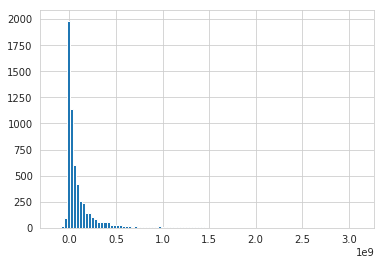

In [10]:
movie_budgets["P/L"].hist(bins=100)

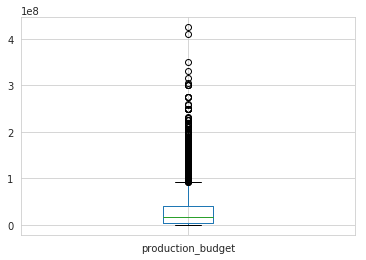

In [11]:
movie_budgets.production_budget.plot.box()

In [12]:
movie_budgets.loc[movie_budgets.production_budget < 10000].count()

id                   10
release_date         10
movie                10
production_budget    10
domestic_gross       10
worldwide_gross      10
P/L                  10
dtype: int64

In [13]:
movie_budgets.loc[movie_budgets.domestic_gross == 0].count()

id                   548
release_date         548
movie                548
production_budget    548
domestic_gross       548
worldwide_gross      548
P/L                  548
dtype: int64

In [14]:
movie_budgets.loc[movie_budgets.worldwide_gross == 0].count()

id                   367
release_date         367
movie                367
production_budget    367
domestic_gross       367
worldwide_gross      367
P/L                  367
dtype: int64

In [15]:
movie_budgets.loc[movie_budgets.worldwide_gross == movie_budgets.domestic_gross].count()

id                   1619
release_date         1619
movie                1619
production_budget    1619
domestic_gross       1619
worldwide_gross      1619
P/L                  1619
dtype: int64

In [16]:
movie_budgets.loc[(movie_budgets.domestic_gross == 0) & (movie_budgets.worldwide_gross == 0)].count()

id                   367
release_date         367
movie                367
production_budget    367
domestic_gross       367
worldwide_gross      367
P/L                  367
dtype: int64

Getting rid of 0 domestic **and** 0 worldwide

In [17]:
movie_budgets = movie_budgets[~((movie_budgets.domestic_gross == 0) & (movie_budgets.worldwide_gross == 0))]
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,P/L
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2683973445
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2426949682
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,972840850
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,584969504
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,779695098


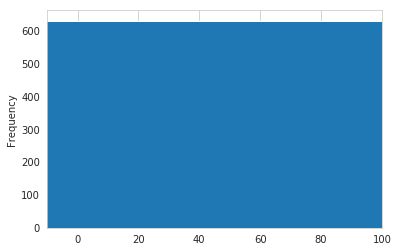

In [18]:
movie_budgets["P/L"].plot.hist(bins=500, xlim=(-10,100))

In [19]:
movie_budgets["P/L"].describe()

count    5.415000e+03
mean     1.090913e+08
std      2.159389e+08
min     -1.574753e+08
25%      7.075190e+05
50%      3.170742e+07
75%      1.217785e+08
max      3.111853e+09
Name: P/L, dtype: float64

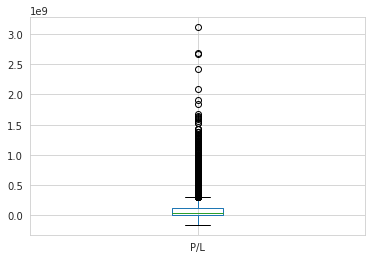

In [20]:
movie_budgets["P/L"].plot.box()

In [21]:
movie_budgets[movie_budgets["P/L"]<=0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,P/L
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-89057484
220,21,"Jul 29, 2005",Stealth,138000000,32116746,76416746,-29466508
223,24,"Jul 11, 2001",Final Fantasy: The Spirits Within,137000000,32131830,85131830,-19736340
254,55,"Jul 19, 2013",R.I.P.D.,130000000,33618855,79076678,-17304467
280,81,"Jan 13, 2017",Monster Trucks,125000000,33370166,61642798,-29987036
281,82,"Aug 27, 1999",The 13th Warrior,125000000,32698899,61698899,-30602202
300,1,"Dec 17, 2010",How Do You Know?,120000000,30212620,49628177,-40159203
340,41,"Jun 16, 2004",Around the World in 80 Days,110000000,24004159,72004159,-13991682
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-103800000


In [22]:
movie_budgets["P/L"].mean()

109091269.05891043

- micro-budget: 0 to 500k [denote 0]
- low-budget: 500k to 3 mil [denote 1]
- big-budget: 3 mil to 50 mil [denote 2]
- mega-budget: anything higher [denote 3]

In [23]:
def get_budget_cat(pb):
    if pb <= 500000:
        return 0
    elif pb <= 3000000:
        return 1
    elif pb <= 50000000:
        return 2
    else:
        return 3

In [24]:
movie_budgets["budget_cat"] = movie_budgets.production_budget.apply(lambda x: get_budget_cat(x))
movie_budgets.head()

/home/nt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,P/L,budget_cat
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,3
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,3
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300,3
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,3
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,3


In [25]:
micro_budget = movie_budgets[movie_budgets.budget_cat == 0]

In [26]:
low_budget = movie_budgets[movie_budgets.budget_cat == 1]

In [27]:
big_budget = movie_budgets[movie_budgets.budget_cat == 2]

In [28]:
mega_budget = movie_budgets[movie_budgets.budget_cat == 3]

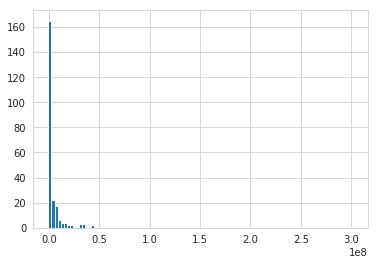

In [29]:
micro_budget["P/L"].hist(bins = 100)

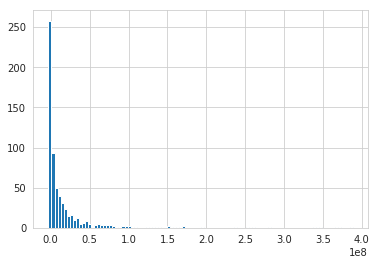

In [30]:
low_budget["P/L"].hist(bins = 100)

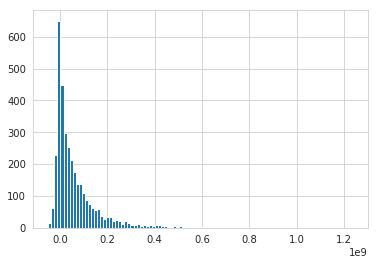

In [31]:
big_budget["P/L"].hist(bins = 100)

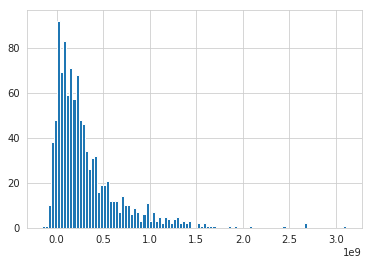

In [32]:
mega_budget["P/L"].hist(bins = 100)

In [33]:
micro_budget["P/L"].describe()

count    2.430000e+02
mean     7.982881e+06
std      2.566009e+07
min     -4.989440e+05
25%     -6.079250e+04
50%      4.472300e+05
75%      4.668235e+06
max      3.016518e+08
Name: P/L, dtype: float64

In [34]:
low_budget["P/L"].describe()

count    6.260000e+02
mean     1.830279e+07
std      4.604544e+07
min     -2.990690e+06
25%     -7.281150e+05
50%      3.124770e+06
75%      1.650000e+07
max      3.882391e+08
Name: P/L, dtype: float64

In [35]:
big_budget["P/L"].describe()

count    3.473000e+03
mean     6.860356e+07
std      1.145267e+08
min     -4.858338e+07
25%      3.362930e+05
50%      2.980785e+07
75%      9.134759e+07
max      1.236596e+09
Name: P/L, dtype: float64

In [36]:
mega_budget["P/L"].describe()

count    1.073000e+03
mean     3.160034e+08
std      3.692383e+08
min     -1.574753e+08
25%      7.430423e+07
50%      2.068873e+08
75%      4.144865e+08
max      3.111853e+09
Name: P/L, dtype: float64

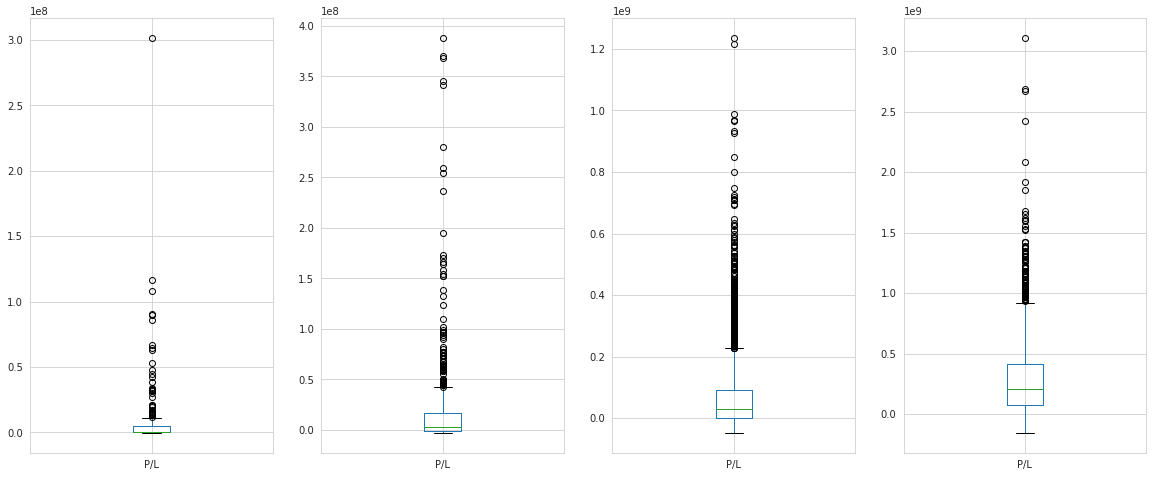

In [37]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(141)
micro_budget["P/L"].plot.box()

ax2 = fig.add_subplot(142)
low_budget["P/L"].plot.box()

ax3 = fig.add_subplot(143)
big_budget["P/L"].plot.box()

ax4 = fig.add_subplot(144)
mega_budget["P/L"].plot.box()